# NNIA: Tutorial 3 - 28.11.2017

In [1]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Organizational things
### General
* Please use correct **file names**, etc. We use automatic scripts to download and send you graded submissions back. If you don't follow the submission guidelines, then your homework can be lost.
* Please send as a submission a **single .ipynb file**.
* There is only **one exception** to this rule: **Images**.
    * Use markown syntax to include the image in the notebook.
    * Attach the image file to the email.
* Only the last submission counts. In is OK to send multiple submissions as long as deadline is **not** violated.
* In case you submit your assignmet to me for the first time. Please give the following information at the beginning of the jupyter notebook: *name*, *student id*, *email address*. Thanks.

## Quiz: Feedback?

## However: Subject line should always start with [NNIA][assignment-i]

where $i$ is the id of the current assignment sheet.

---

## Assignment-3

#### 1. Numerical Problems in Deep Learning

#### 2. Principal Component Analysis (PCA)

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Specify first data set
A = np.asarray([[2.0, 4.0], [2.0, 2.0], [3.0, 1.0], [5.0, 1.0]], dtype=np.float32)
print('Original data:')
print(A)

Original data:
[[ 2.  4.]
 [ 2.  2.]
 [ 3.  1.]
 [ 5.  1.]]


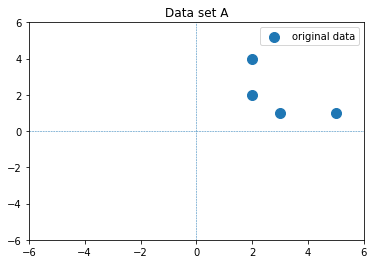

In [4]:
# Plot data
fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(A[:, 0], A[:, 1], s=1e2, label='original data')
axes.set_title('Data set A')
axes.legend();

In [5]:
# Compute the mean along each axes
x_mean = np.mean(A[:, 0])
y_mean = np.mean(A[:, 1])

AC = np.copy(A)

# Center data
AC[:, 0] = AC[:, 0] - x_mean
AC[:, 1] = AC[:, 1] - y_mean

print('Centered data:')
print(AC)

Centered data:
[[-1.  2.]
 [-1.  0.]
 [ 0. -1.]
 [ 2. -1.]]


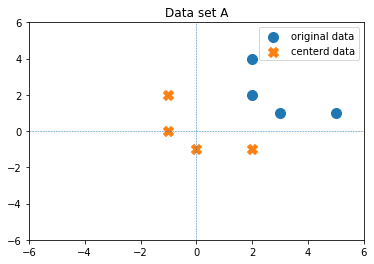

In [6]:
# Plot centered data together with original data
fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(A[:, 0], A[:, 1], s=1e2, label='original data')
axes.scatter(AC[:, 0], AC[:, 1], marker='X', s=1e2, label='centerd data')
axes.set_title('Data set A');
axes.legend();

In [7]:
# Create covariance matrix of the centered data
C = np.matmul(AC.T, AC)
print('Covariance matrix of the centered data:')
print(C)

Covariance matrix of the centered data:
[[ 6. -4.]
 [-4.  6.]]


In [8]:
# Compute eigenvalues and eigenvectors of the covariance matrix
u, s, v = np.linalg.svd(C)
print('Eigendecomposition of the covariance matrix:')
print(u)
print(s)
print(v)
# Check the norm of the computed eigenvectors
for i in range(2):
    if np.isclose(np.linalg.norm(u[i]), 1.0):
        print('u[{:d}] is a unit vector'.format(i))

Eigendecomposition of the covariance matrix:
[[-0.70710677  0.70710677]
 [ 0.70710677  0.70710677]]
[ 10.   2.]
[[-0.70710677  0.70710677]
 [ 0.70710677  0.70710677]]
u[0] is a unit vector
u[1] is a unit vector


In [9]:
# Encode data
E = np.dot(AC, u[0])
print('Encoded data:')
print(E)

Encoded data:
[ 2.12132025  0.70710677 -0.70710677 -2.12132025]


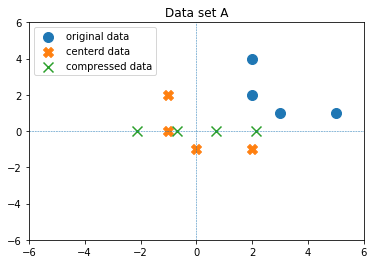

In [10]:
# Plot centered data together with original data and encoded data
fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(A[:, 0], A[:, 1], s=1e2, label='original data')
axes.scatter(AC[:, 0], AC[:, 1], marker='X', s=1e2, label='centerd data')
axes.scatter(E, np.zeros(len(E)), marker='x', s=1e2, label='compressed data');
axes.set_title('Data set A');
axes.legend();

In [11]:
# Reconstruct data
E = np.reshape(E, newshape=(4, 1))
g = np.reshape(u[0], newshape=(2, 1))

D = np.dot(g, E.T)
D = D.T
print('Reconstructed data:')
print(D)

Reconstructed data:
[[-1.49999988  1.49999988]
 [-0.49999997  0.49999997]
 [ 0.49999997 -0.49999997]
 [ 1.49999988 -1.49999988]]


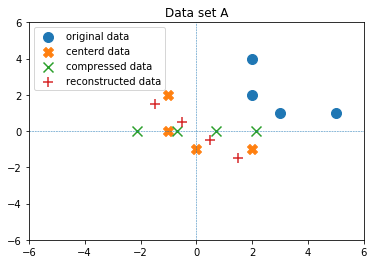

In [12]:
# Plot centered data together with original data and encoded data
fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(A[:, 0], A[:, 1], s=1e2, label='original data')
axes.scatter(AC[:, 0], AC[:, 1], marker='X', s=1e2, label='centerd data')
axes.scatter(E, np.zeros(len(E)), marker='x', s=1e2, label='compressed data')
axes.scatter(D[:, 0], D[:, 1], marker='+', s=1e2, label='reconstructed data')
axes.set_title('Data set A')
axes.legend();

Reconstructed data + mean
[[ 1.50000012  3.5       ]
 [ 2.5         2.5       ]
 [ 3.5         1.5       ]
 [ 4.5         0.50000012]]


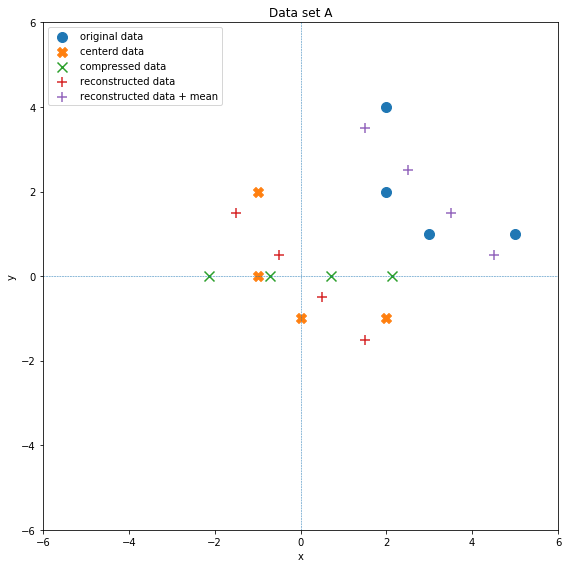

In [13]:
# Add mean to the reconstructed data
DM = np.copy(D)
DM[:, 0] = DM[:, 0] + x_mean
DM[:, 1] = DM[:, 1] + y_mean
print('Reconstructed data + mean')
print(DM)

# Plot data
fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(A[:, 0], A[:, 1], s=1e2, label='original data')
axes.scatter(AC[:, 0], AC[:, 1], marker='X', s=1e2, label='centerd data')
axes.scatter(E, np.zeros(len(E)), marker='x', s=1e2, label='compressed data')
axes.scatter(D[:, 0], D[:, 1], marker='+', s=1e2, label='reconstructed data')
axes.scatter(DM[:, 0], DM[:, 1], marker='+', s=1e2, label='reconstructed data + mean')
axes.set_title('Data set A')

axes.set_xlabel('x')
axes.set_ylabel('y')

axes.legend(loc='upper left')

# Specify size and layout
width  = 8.0
height = 8.0
fig.set_size_inches(width, height)
plt.tight_layout()
plt.show()

In [14]:
import matplotlib.lines as mpl

def slope_from_points(point1, point2):
    return (point2[1] - point1[1])/(point2[0] - point1[0])

def plot_secant(point1, point2, ax, pc):
    # plot the secant
    slope = slope_from_points(point1, point2)
    intercept = point1[1] - slope*point1[0] 
    # update the points to be on the axes limits
    x = ax.get_xlim()
    y = ax.get_ylim()
    data_y = [x[0]*slope+intercept, x[1]*slope+intercept]
    line = mpl.Line2D(x, data_y, ls='--', color='red', alpha=0.5, label='{:d} principal component'.format(pc))
    ax.add_line(line)
    return ax

In [15]:
# Compute encoding with respect to second eigenvector
E2 = np.dot(AC, u[1])
print('Encoded data:')
print(E)

# Reconstruct data
E2 = np.reshape(E2, newshape=(4, 1))
g2 = np.reshape(u[1], newshape=(2, 1))
D2 = np.dot(g2, E2.T)
D2 = D2.T
print('Reconstructed data:')
print(D2)

Encoded data:
[[ 2.12132025]
 [ 0.70710677]
 [-0.70710677]
 [-2.12132025]]
Reconstructed data:
[[ 0.49999997  0.49999997]
 [-0.49999997 -0.49999997]
 [-0.49999997 -0.49999997]
 [ 0.49999997  0.49999997]]


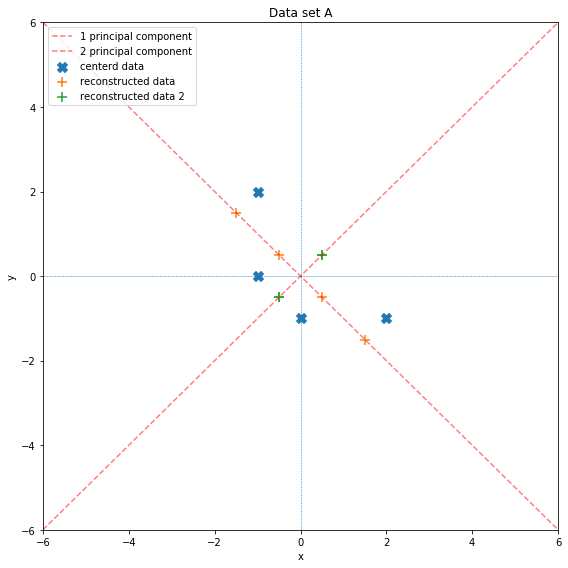

In [16]:
# Plot centered data together with original data and encoded data
# plt.xkcd()

fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(AC[:, 0], AC[:, 1], marker='X', s=1e2, label='centerd data')
axes.scatter(D[:, 0], D[:, 1], marker='+', s=1e2, label='reconstructed data')
axes.scatter(D2[:, 0], D2[:, 1], marker='+', s=1e2, label='reconstructed data 2')

axes = plot_secant((D[:, 0][0], D[:, 1][0]), (D[:, 0][3], D[:, 1][3]), axes, 1)
axes = plot_secant((D2[:, 0][0], D2[:, 1][0]), (D2[:, 0][1], D2[:, 1][1]), axes, 2)

axes.set_title('Data set A')

axes.set_xlabel('x')
axes.set_ylabel('y')

axes.legend(loc='upper left')

# Specify size and layout
width  = 8.0
height = 8.0
fig.set_size_inches(width, height)
plt.tight_layout()
plt.show()

In [17]:
# Variance explained by the first principal component
print('Variance explained by first PC: {:.3f}'.format(s[0] / np.sum(s)))
print('Variance explained by second PC: {:.3f}'.format(s[1] / np.sum(s)))

Variance explained by first PC: 0.833
Variance explained by second PC: 0.167


In [18]:
RD = D + D2
print('Reconstructed data:')
print(RD)
print('Centered data:')
print(AC)

Reconstructed data:
[[-0.99999988  1.99999988]
 [-0.99999994  0.        ]
 [ 0.         -0.99999994]
 [ 1.99999988 -0.99999988]]
Centered data:
[[-1.  2.]
 [-1.  0.]
 [ 0. -1.]
 [ 2. -1.]]


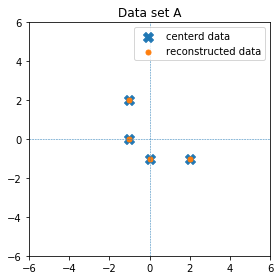

In [19]:
# Plot centered data together with original data
fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(AC[:, 0], AC[:, 1], marker='X', s=1e2, label='centerd data')
axes.scatter(RD[:, 0], RD[:, 1], marker='.', s=1e2, label='reconstructed data')
axes.set_title('Data set A');
axes.legend()
# Specify size and layout
width  = 4.0
height = 4.0
fig.set_size_inches(width, height)
plt.tight_layout()
plt.show()

In [20]:
B = np.asarray([[-1.0, 1.0], [-2.0, 2.0], [-1.0, 3.0], [-1.0, 4.0]], dtype=np.float32)
print('Original data:')
print(B)

Original data:
[[-1.  1.]
 [-2.  2.]
 [-1.  3.]
 [-1.  4.]]


In [21]:
# Compute the mean along each axes
x_mean = np.mean(B[:, 0])
y_mean = np.mean(B[:, 1])

BC = np.copy(B)

# Center data
BC[:, 0] = BC[:, 0] - x_mean
BC[:, 1] = BC[:, 1] - y_mean

print('Centered data:')
print(BC)

Centered data:
[[ 0.25 -1.5 ]
 [-0.75 -0.5 ]
 [ 0.25  0.5 ]
 [ 0.25  1.5 ]]


In [22]:
# Create covariance matrix of the centered data
C = np.matmul(BC.T, BC)
print('Covariance matrix of the centered data:')
print(C)

Covariance matrix of the centered data:
[[ 0.75  0.5 ]
 [ 0.5   5.  ]]


In [23]:
# Compute eigenvalues and eigenvectors of the covariance matrix
u, s, v = np.linalg.svd(C)
print('Eigendecomposition of the covariance matrix:')
print(u)
print(s)
print(v)
# Check the norm of the computed eigenvectors
for i in range(2):
    if np.isclose(np.linalg.norm(u[i]), 1.0):
        print('u[{:d}] is a unit vector'.format(i))

Eigendecomposition of the covariance matrix:
[[ 0.1152884   0.99333209]
 [ 0.99333209 -0.1152884 ]]
[ 5.05803108  0.69196886]
[[ 0.1152884   0.99333209]
 [ 0.99333209 -0.1152884 ]]
u[0] is a unit vector
u[1] is a unit vector


In [24]:
# Encode data
E = np.dot(BC, u[0])
print('Encoded data:')
print(E)

Encoded data:
[-1.46117604 -0.58313233  0.52548814  1.51882017]


In [25]:
# Reconstruct data
E = np.reshape(E, newshape=(4, 1))
g = np.reshape(u[0], newshape=(2, 1))

D = np.dot(g, E.T)
D = D.T
print('Reconstructed data:')
print(D)

Reconstructed data:
[[-0.16845664 -1.45143306]
 [-0.06722839 -0.57924408]
 [ 0.06058269  0.52198422]
 [ 0.17510234  1.50869286]]


Reconstructed data + mean
[[-1.41845667  1.04856694]
 [-1.31722844  1.92075586]
 [-1.18941736  3.0219841 ]
 [-1.07489765  4.00869274]]


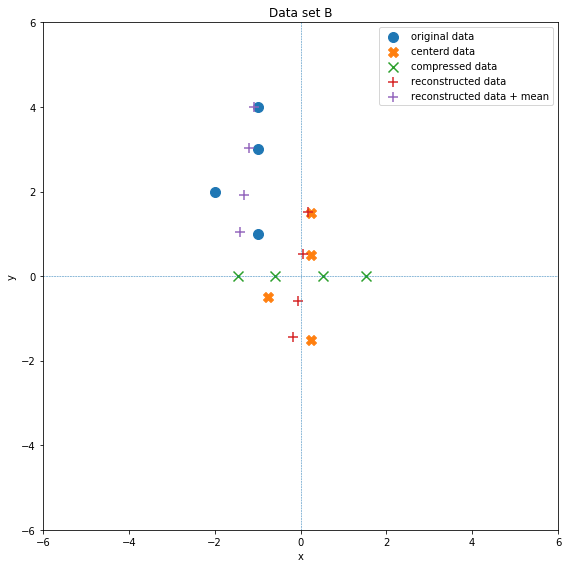

In [26]:
# Add mean to the reconstructed data
DM = np.copy(D)
DM[:, 0] = DM[:, 0] + x_mean
DM[:, 1] = DM[:, 1] + y_mean

print('Reconstructed data + mean')
print(DM)

# Plot data
fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-6.0, 6.0)
axes.set_ylim(-6.0, 6.0)
# Plot data points
axes.scatter(B[:, 0], B[:, 1], s=1e2, label='original data')
axes.scatter(BC[:, 0], BC[:, 1], marker='X', s=1e2, label='centerd data')
axes.scatter(E, np.zeros(len(E)), marker='x', s=1e2, label='compressed data')
axes.scatter(D[:, 0], D[:, 1], marker='+', s=1e2, label='reconstructed data')
axes.scatter(DM[:, 0], DM[:, 1], marker='+', s=1e2, label='reconstructed data + mean')
axes.set_title('Data set B')

axes.set_xlabel('x')
axes.set_ylabel('y')

axes.legend(loc='upper right')

# Specify size and layout
width  = 8.0
height = 8.0
fig.set_size_inches(width, height)
plt.tight_layout()
plt.show()

In [27]:
# Compute encoding with respect to second eigenvector
E2 = np.dot(BC, u[1])
print('Encoded data:')
print(E)

# Reconstruct data
E2 = np.reshape(E2, newshape=(4, 1))
g2 = np.reshape(u[1], newshape=(2, 1))
D2 = np.dot(g2, E2.T)
D2 = D2.T
print('Reconstructed data:')
print(D2)

Encoded data:
[[-1.46117604]
 [-0.58313233]
 [ 0.52548814]
 [ 1.51882017]]
Reconstructed data:
[[ 0.41845664 -0.04856704]
 [-0.68277162  0.07924404]
 [ 0.18941732 -0.02198421]
 [ 0.07489766 -0.00869279]]


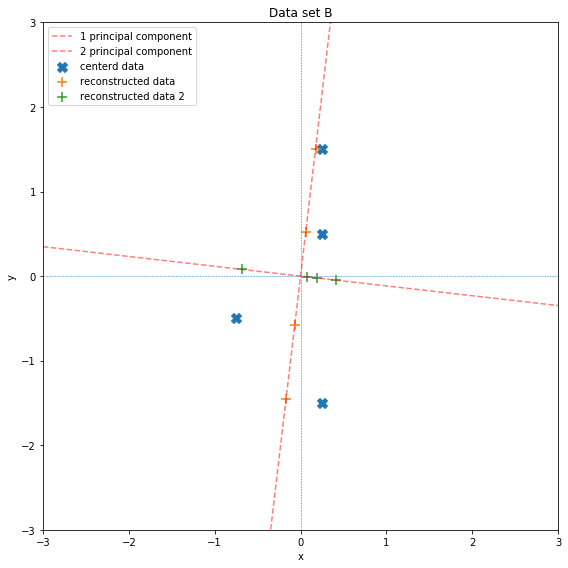

In [28]:
# Plot centered data together with original data and encoded data
# plt.xkcd()

fig, axes = plt.subplots()
# plot coordinate system
axes.axhline(0, ls='--', linewidth=0.5)
axes.axvline(0, ls='--', linewidth=0.5)
axes.set_xlim(-3.0, 3.0)
axes.set_ylim(-3.0, 3.0)
# Plot data points
axes.scatter(BC[:, 0], BC[:, 1], marker='X', s=1e2, label='centerd data')
axes.scatter(D[:, 0], D[:, 1], marker='+', s=1e2, label='reconstructed data')
axes.scatter(D2[:, 0], D2[:, 1], marker='+', s=1e2, label='reconstructed data 2')

axes = plot_secant((D[:, 0][0], D[:, 1][0]), (D[:, 0][3], D[:, 1][3]), axes, 1)
axes = plot_secant((D2[:, 0][0], D2[:, 1][0]), (D2[:, 0][1], D2[:, 1][1]), axes, 2)

axes.set_title('Data set B')

axes.set_xlabel('x')
axes.set_ylabel('y')

axes.legend(loc='upper left')

# Specify size and layout
width  = 8.0
height = 8.0
fig.set_size_inches(width, height)
plt.tight_layout()
plt.show()

#### 3. Gradient descent vs. Newtons method

df(0) = -5.00
ddf(0) = 0.00


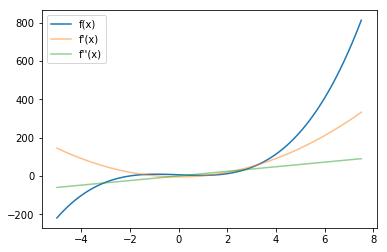

In [29]:
def f(x):
    return 2.0 * (x ** 3) - 5.0 * x + 6.0
def df(x):
    return 6.0 * (x ** 2) - 5.0
def ddf(x):
    return 12.0 * x

# Plot graphs
xs = np.linspace(-5.0, 7.5, 100)
plt.plot(xs, f(xs), label='f(x)')
plt.plot(xs, df(xs), label="f'(x)", alpha=.5)
plt.plot(xs, ddf(xs), label="f''(x)", alpha=.5)
plt.legend();

print('df(0) = {:.2f}'.format(df(0.0)))
print('ddf(0) = {:.2f}'.format(ddf(0.0)))

#### 4. Visualization of gradient descent

#### 5. Linear Algebra bonus

---

## Matplotlib Tutorial

Check [this tutorial](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) for a great introduction.

Some advices:
* Create figure and axes objects explicitly using `plt.subplots()` [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots)
* Use plotting functions such as `scatter()` on the axes object instead of calling `plt.scatter()`.
* Always use `scatter()` instead of `plot()` when producting scatter plots.
* Use `plt.tight_layout()` to avoid overlapping labels and axes.
* Matplotlib API can be very confusing, a good starting point is the [documentation](https://matplotlib.org/api/axes_api.html) of the axes class.
* Matplotlib supports $\LaTeX$ [rendering](https://matplotlib.org/users/usetex.html)
* Always use `%matplotlib inline` magic command inside jupyter notebooks.
* Use `;` to surpress output produced by calling matplotlib functions.
* In case you don't like the default style, checkout the styles [reference](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html).

Example:

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Enable latex support 
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']}) # let's use a serif font
rc('text', usetex=True)

In [4]:
# Create some data
mean1 = [0, 0]
cov1 = [[1, 0], [0, 2]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [3, 3]
cov2 = [[1.5, 0], [0, 1]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 1000).T

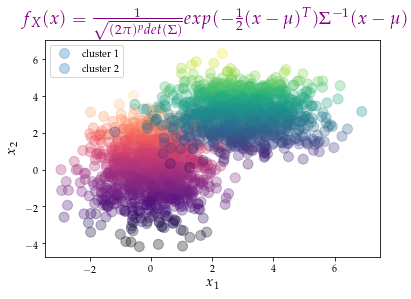

In [12]:
# Let's create a figure
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.set_title(r"$f_X(x) = \frac{1}{\sqrt{(2\pi)^p det(\Sigma)}} exp(- \frac{1}{2}(x - \mu)^T) \Sigma^{-1}(x - \mu)$",
          fontsize=18, color='purple')
axes.scatter(x1, y1, marker='o', alpha=0.3, label=r"cluster $1$", c=y1, s=1e2, cmap='magma')
axes.scatter(x2, y2, marker='o', alpha=0.3, label=r"cluster $2$", c=y2, s=1e2, cmap='viridis')

axes.set_xlabel(r"$x_1$", fontsize=14)
axes.set_ylabel(r"$x_2$", fontsize=14)

# Display legend
axes.legend(loc='upper left');

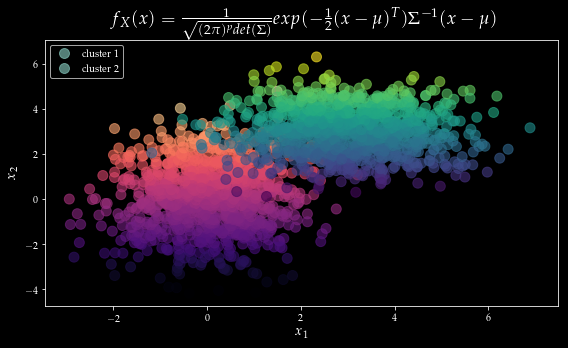

In [6]:
# Let's create a figure using a particular style
with plt.style.context('dark_background'):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.set_title(r"$f_X(x) = \frac{1}{\sqrt{(2\pi)^p det(\Sigma)}} exp(- \frac{1}{2}(x - \mu)^T) \Sigma^{-1}(x - \mu)$",
              fontsize=18, color='white')
    axes.scatter(x1, y1, marker='o', alpha=0.6, label=r"cluster $1$", c=y1, s=1e2, cmap='magma')
    axes.scatter(x2, y2, marker='o', alpha=0.6, label=r"cluster $2$", c=y2, s=1e2, cmap='viridis')

    axes.set_xlabel(r"$x_1$", fontsize=14)
    axes.set_ylabel(r"$x_2$", fontsize=14)

    # Display legend
    axes.legend(loc='upper left')

    # Specify size and layout
    width  = 8.0
    height = width / 1.618
    fig.set_size_inches(width, height)
    plt.tight_layout()

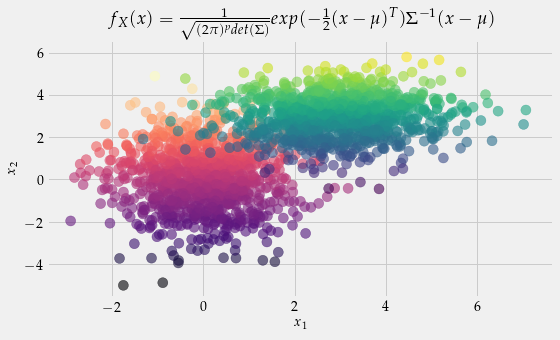

In [34]:
# Let's create a figure using a particular style
with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.set_title(r"$f_X(x) = \frac{1}{\sqrt{(2\pi)^p det(\Sigma)}} exp(- \frac{1}{2}(x - \mu)^T) \Sigma^{-1}(x - \mu)$",
              fontsize=18, color='black')
    axes.scatter(x1, y1, marker='o', alpha=0.6, label=r"cluster $1$", c=y1, s=1e2, cmap='magma')
    axes.scatter(x2, y2, marker='o', alpha=0.6, label=r"cluster $2$", c=y2, s=1e2, cmap='viridis')

    axes.set_xlabel(r"$x_1$", fontsize=14)
    axes.set_ylabel(r"$x_2$", fontsize=14)

    # Display legend
    # axes.legend(loc='upper left')

    # Specify size and layout
    width  = 8.0
    height = width / 1.618
    fig.set_size_inches(width, height)
    plt.tight_layout();

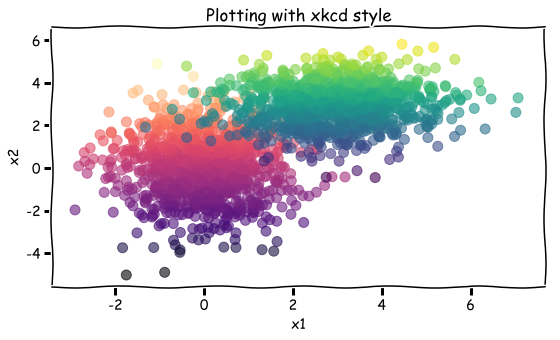

In [35]:
# Let's create a figure using a xkcd style

# Enable latex support 
from matplotlib import rc
rc('text', usetex=False)
plt.xkcd()

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.scatter(x1, y1, marker='o', alpha=0.6, label="cluster 1", c=y1, s=1e2, cmap='magma')
axes.scatter(x2, y2, marker='o', alpha=0.6, label="cluster 2", c=y2, s=1e2, cmap='viridis')

axes.set_title('Plotting with xkcd style')
axes.set_xlabel('x1', fontsize=14)
axes.set_ylabel('x2', fontsize=14)

# Display legend
# axes.legend(loc='upper left')

# Specify size and layout
width  = 8.0
height = width / 1.618
fig.set_size_inches(width, height)
plt.tight_layout();